In [278]:
import os
import requests
import pandas as pd

In [279]:
cwd = os.getcwd()
# path = os.path.dirname(os.path.dirname(cwd))
path = '/home/nacho/Documents/TEST_DE_PROGRAMACION_JR_DATA_ENGINEER'
os.chdir(path)

In [280]:
os.getcwd()

'/home/nacho/Documents/TEST_DE_PROGRAMACION_JR_DATA_ENGINEER'

# 61 años por pais

# 120 paises

In [295]:
df_pobl = pd.DataFrame(index = pd.date_range('1960', '2022', freq='Y', name='year'), columns = ['mundial'])
df_pobl.index = df_pobl.index.year

In [296]:
url = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&page=1"
page = requests.get(url)

In [297]:
last_page = page.json()[0]['pages']
list_poblacion = []
for page_number in range(1, last_page + 1):
    page = requests.get("http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&page=" + str(page_number))
    country_name = page.json()[1][0]['country']['value']
    for i in range(0, len(page.json()[1])):
        value_poblacion = page.json()[1][i]['value']
        list_poblacion.append(value_poblacion)
        if len(list_poblacion) == 62:
            list_poblacion.reverse()
            df_pobl[str(country_name)] = list_poblacion
            list_poblacion.clear()
            pass 

/tmp/ipykernel_3240/304567124.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pobl[str(country_name)] = list_poblacion


In [298]:
df_pobl

,mundial,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,130836765,96396419,92197715,4194711,91401764,980003345,1041673567,894885526,883445587,...,2538648,8526299,63689,8141839,32670048,32500,NaN,5315351,3070780,3776679
1961,NaN,134159786,98407221,94724540,4274052,92232738,1003194972,1043656626,894489549,882807979,...,2571682,8813619,65700,8439261,33666111,34300,NaN,5393034,3164330,3905038
1962,NaN,137614644,100506960,97334438,4353623,93009498,1027204700,1058119847,906424232,894536202,...,2603883,9113629,67793,8742780,34683410,35000,NaN,5473671,3260645,4039209
1963,NaN,141202036,102691339,100034191,4432240,93840016,1051972834,1083884354,929645285,917563058,...,2635125,9428906,69944,9052632,35721213,39800,NaN,5556767,3360099,4178726
1964,NaN,144920186,104953470,102832792,4508189,94715795,1077531237,1109291332,952505018,940205341,...,2665383,9762819,72116,9369101,36780001,40800,NaN,5641598,3463211,4322854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,626392880,423769930,411942825,7314956,102740078,3206485623,2324120551,2077988679,2052513823,...,3436645,32388600,285499,29402480,94600643,107281,4454805.0,27834811,16853608,14236599
2018,NaN,643090131,435229381,419851989,7358929,102538451,3248413593,2338485387,2091698238,2066103849,...,3449290,32956100,292675,28887117,95545959,107001,4569087.0,28498683,17351714,14438812
2019,NaN,660046272,446911598,427870273,7401389,102398494,3290291029,2351127942,2103723076,2078012370,...,3461731,33580350,299882,28515829,96462108,106669,4685306.0,29161922,17861034,14645473


In [299]:
df_pobl = df_pobl.dropna(axis=1, how='any')

In [301]:
df_pobl['mundial'] = df_pobl.iloc[:,1:-1].sum(axis=1) 

/tmp/ipykernel_3240/4057204878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobl['mundial'] = df_pobl.iloc[:,1:-1].sum(axis=1)


In [302]:
df_pobl

,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),"Yemen, Rep.",Zambia,Zimbabwe,mundial
year,,,,,,,,,,,,,,,,,,,,,
1960,130836765,96396419,92197715,4194711,91401764,980003345,1041673567,894885526,883445587,265203956,...,2538648,8526299,63689,8141839,32670048,32500,5315351,3070780,3776679,30772639416
1961,134159786,98407221,94724540,4274052,92232738,1003194972,1043656626,894489549,882807979,267621091,...,2571682,8813619,65700,8439261,33666111,34300,5393034,3164330,3905038,31176915310
1962,137614644,100506960,97334438,4353623,93009498,1027204700,1058119847,906424232,894536202,270110063,...,2603883,9113629,67793,8742780,34683410,35000,5473671,3260645,4039209,31729536699
1963,141202036,102691339,100034191,4432240,93840016,1051972834,1083884354,929645285,917563058,272655396,...,2635125,9428906,69944,9052632,35721213,39800,5556767,3360099,4178726,32416931479
1964,144920186,104953470,102832792,4508189,94715795,1077531237,1109291332,952505018,940205341,275163380,...,2665383,9762819,72116,9369101,36780001,40800,5641598,3463211,4322854,33109777540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,626392880,423769930,411942825,7314956,102740078,3206485623,2324120551,2077988679,2052513823,341217243,...,3436645,32388600,285499,29402480,94600643,107281,27834811,16853608,14236599,80260804556
2018,643090131,435229381,419851989,7358929,102538451,3248413593,2338485387,2091698238,2066103849,341979171,...,3449290,32956100,292675,28887117,95545959,107001,28498683,17351714,14438812,81236956491
2019,660046272,446911598,427870273,7401389,102398494,3290291029,2351127942,2103723076,2078012370,342283354,...,3461731,33580350,299882,28515829,96462108,106669,29161922,17861034,14645473,82192344839


In [303]:
df_pobl.to_csv("df_pobl.csv")

## Prediccion

In [307]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns; sns.set()
from scipy import stats
from matplotlib import pyplot as plt
from darts import TimeSeries
from darts.metrics import mape, mse, mae 
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.models import (
    LinearRegressionModel,
    RNNModel,
    RegressionModel,
    ARIMA,
    AutoARIMA
)

In [308]:
df_pobl = pd.read_csv("df_pobl.csv", index_col=0)

In [309]:
df_pobl

,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),"Yemen, Rep.",Zambia,Zimbabwe,mundial
year,,,,,,,,,,,,,,,,,,,,,
1960,130836765,96396419,92197715,4194711,91401764,980003345,1041673567,894885526,883445587,265203956,...,2538648,8526299,63689,8141839,32670048,32500,5315351,3070780,3776679,30772639416
1961,134159786,98407221,94724540,4274052,92232738,1003194972,1043656626,894489549,882807979,267621091,...,2571682,8813619,65700,8439261,33666111,34300,5393034,3164330,3905038,31176915310
1962,137614644,100506960,97334438,4353623,93009498,1027204700,1058119847,906424232,894536202,270110063,...,2603883,9113629,67793,8742780,34683410,35000,5473671,3260645,4039209,31729536699
1963,141202036,102691339,100034191,4432240,93840016,1051972834,1083884354,929645285,917563058,272655396,...,2635125,9428906,69944,9052632,35721213,39800,5556767,3360099,4178726,32416931479
1964,144920186,104953470,102832792,4508189,94715795,1077531237,1109291332,952505018,940205341,275163380,...,2665383,9762819,72116,9369101,36780001,40800,5641598,3463211,4322854,33109777540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,626392880,423769930,411942825,7314956,102740078,3206485623,2324120551,2077988679,2052513823,341217243,...,3436645,32388600,285499,29402480,94600643,107281,27834811,16853608,14236599,80260804556
2018,643090131,435229381,419851989,7358929,102538451,3248413593,2338485387,2091698238,2066103849,341979171,...,3449290,32956100,292675,28887117,95545959,107001,28498683,17351714,14438812,81236956491
2019,660046272,446911598,427870273,7401389,102398494,3290291029,2351127942,2103723076,2078012370,342283354,...,3461731,33580350,299882,28515829,96462108,106669,29161922,17861034,14645473,82192344839


In [310]:
dataset = df_pobl['Mexico']

In [311]:
ts_models = [
    ARIMA(),
    AutoARIMA()
    ]

In [312]:
# MSE, MAE y MAPE

In [313]:
dict_list = ['name', 'prediction', 'model', 'mape', 'mae', 'mse']
class_dict = {}
class_list = []

for i, forecaster in enumerate(ts_models):
    class_dict = {}
    class_dict[dict_list[0]] = (forecaster.__class__.__name__)
    #############
    df_pred = dataset.copy()
    df_pred = pd.DataFrame(df_pred)
    df_pred['Year'] = pd.date_range('1960', '2022', freq='Y')
    series = TimeSeries.from_dataframe(df_pred, 'Year', dataset.name)
    train, val = series.split_before(pd.Timestamp('20181231'))
    forecaster.fit(train)
    prediction = forecaster.predict(len(val))
    ##############
    class_dict[dict_list[1]] = prediction
    class_dict[dict_list[2]] = forecaster
    class_dict[dict_list[3]] = mape(val, prediction)
    class_dict[dict_list[4]] = mae(val, prediction)
    class_dict[dict_list[5]] = mse(val, prediction)
    
    class_list.append(class_dict)

/home/nacho/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/nacho/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [314]:
minl = []
for dicts in class_list:
    print(dicts['name'],':',dicts['mape'])
    minl.append(dicts['mape'])

min_mape = min(minl)

def return_best_mape(class_list, min_mape):
    for dicts in class_list:
        if dicts['mape'] == min_mape:
            return dicts

best_mape = return_best_mape(class_list, min_mape)
print(best_mape)

ARIMA : 1.3413611094052402
AutoARIMA : 0.32544271878112074
{'name': 'AutoARIMA', 'prediction': <TimeSeries (DataArray) (Year: 4, component: 1, sample: 1)>
array([[[1.26330779e+08]],

       [[1.27883991e+08]],

       [[1.29436829e+08]],

       [[1.30989191e+08]]])
Coordinates:
  * Year       (Year) datetime64[ns] 2018-12-31 2019-12-31 2020-12-31 2021-12-31
  * component  (component) object 'Mexico'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None, 'model': <darts.models.forecasting.auto_arima.AutoARIMA object at 0x7fb6841afb20>, 'mape': 0.32544271878112074, 'mae': 419876.2486021668, 'mse': 224331638041.65167}


AutoARIMA 
mape:  0.32544271878112074 
mae:  419876.2486021668 
mse:  224331638041.65167


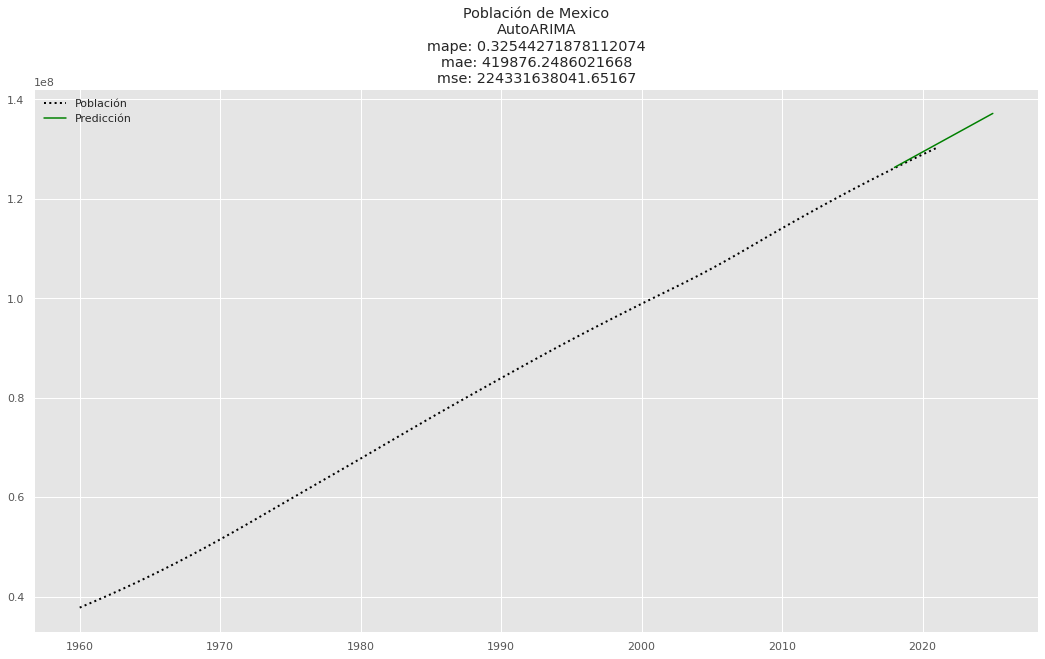

In [315]:
best_prediction = best_mape['model'].predict(8)

matplotlib.style.use('ggplot')
df_prediction = best_prediction.pd_dataframe()
fig, ax = plt.subplots() 
fig.set_size_inches(18, 10)
ax.plot(dataset.index, dataset.values, linestyle = ':', color = 'black', linewidth=2, label='Población')
ax.plot(df_prediction.index.year, df_prediction.values, label = 'Predicción', color = 'green')
plt.title('Población de ' + dataset.name + '\n' + best_mape['name'] + '\nmape: ' + str(best_mape['mape']) + '\nmae: ' + str(best_mape['mae']) + '\nmse: ' + str(best_mape['mse']))
ax.legend()
# plt.tight_layout()
plt.savefig("plots/"+dataset.name+".png")


print(best_mape['name'], '\nmape: ', best_mape['mape'], '\nmae: ', best_mape['mae'], '\nmse: ', best_mape['mse'])

In [319]:
df_prediction.index = df_prediction.index.year

In [320]:
ts_complete = pd.DataFrame(dataset).append(df_prediction.iloc[-4:])
ts_complete.rename(columns={str(dataset.name):str(dataset.name) + '_' + str(best_mape['name'])}, inplace=True)

In [324]:
ts_complete

,Mexico_AutoARIMA
1960,3.777186e+07
1961,3.896605e+07
1962,4.019532e+07
1963,4.146237e+07
1964,4.277108e+07
...,...
2021,1.302622e+08
2022,1.325410e+08
2023,1.340922e+08
2024,1.356434e+08
